In [26]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Read the wine dataset
dataset = load_wine()
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df = df.assign(target=pd.Series(dataset['target']).values)

In [28]:
# Filter the irrelevant columns
df = df[['alcohol', 'magnesium', 'target']]
# Filter the irrelevant label
df = df[df.target != 0]

In [29]:
train_df, val_df = train_test_split(df, test_size=30, random_state=3)

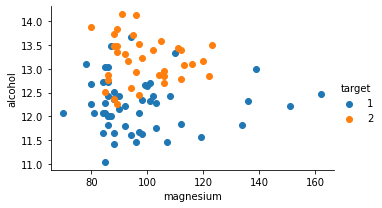

In [30]:
fg = sns.FacetGrid(data=train_df, hue='target', aspect=1.61)
fg.map(plt.scatter, 'magnesium','alcohol').add_legend()

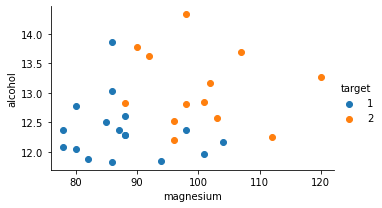

In [31]:
fg = sns.FacetGrid(data=val_df, hue='target', aspect=1.61)
fg.map(plt.scatter, 'magnesium','alcohol').add_legend()

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(train_df[['alcohol','magnesium']], train_df['target'])

question 1: using hard SVM on these datasets